In [2]:
#Importing all required libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading uber request data into dataframe
uberdata = pd.read_csv("Uber Request Data.csv")

In [294]:
#Inspecting uberdata
uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
#Correcting Data formats
uberdata['Request timestamp'] = pd.to_datetime(uberdata['Request timestamp'])
uberdata['Drop timestamp'] = pd.to_datetime(uberdata['Drop timestamp'])

In [296]:
#Calculating null percentages column wise
pd.DataFrame(round((100*(uberdata.isnull().sum()/len(uberdata.index))),2))

,0
Request id,0.00
Pickup point,0.00
Driver id,39.29
Status,0.00
Request timestamp,0.00
Drop timestamp,58.03


In [297]:
#Calculating count of row wise null values
pd.DataFrame(uberdata.isnull().sum(axis=1))

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
#Extracting Hours from Request timestamp column
uberdata['Request Hours'] = uberdata['Request timestamp'].apply(lambda x:x.hour)

In [6]:
#Extracting Hours from Drop timestamp column
uberdata['Drop Hours'] = uberdata['Drop timestamp'].apply(lambda x: x.hour)

In [300]:
#Inspecting final data frame
uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hours,Drop Hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,22.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,7.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,6.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,18.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7.0


Text(0,0.5,'Trip count')

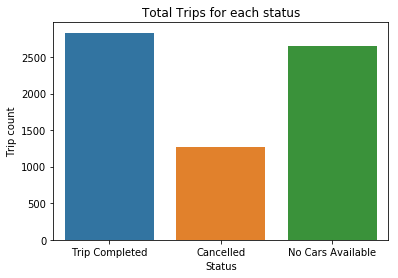

In [28]:
#Plotting Request Status for determining frequency of cancelled/no cars available/Trips completed request
sns.countplot(x="Status",data = uberdata)
plt.title('Total Trips for each status')
plt.ylabel('Trip count')
#From below count plot of all types of trip status we can conclude that an almost equal number of request remain in 
#the status of "No Cars Available" in comparison to "Trips Completed"

Text(0,0.5,'Airport/City trip count')

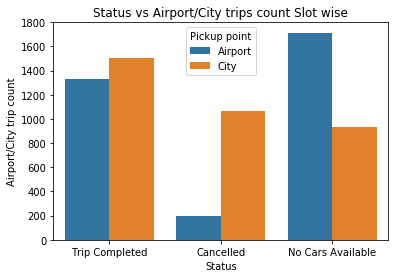

In [26]:
#Determine the most problematic pickup point from for all request status.
sns.countplot(x="Status",hue="Pickup point",data = uberdata)
plt.title('Status vs Airport/City trips count Slot wise')
plt.ylabel('Airport/City trip count')
#Approximately 1600-1700 of the request where pickup point is 'Airport' uber customers don't get the car.Request ends with 'no cars available'
#Approximately between 1400 - 1500 majority trips are completed where pick is from city
#Approximately between 1000-1050 trips are canceled as well where pick up point is from city which is a little less than trips completed where pick up point is city.

In [49]:
#Determine new column for assigning time slot to each trip according to below mentioned cirteria
#Divide hours into different bin range as below
# 0 - 8 - Early Morning
# 8 - 12 - Peak morning hours
# 12 - 17 - Noon hours
# 17 - 21 - Evening hours 
# 21 - 23 - Night Hours

def determine_time_slot(x):
    if (x >=0 and x < 8):
        return "Early Morning"
    elif (x >= 8 and x < 12):
        return "Peak morning hours"
    elif (x >= 12 and x < 17):
        return "Noon Hours"
    elif (x >= 17 and x < 21):
        return "Evening Hours"
    elif (x >= 21 and x <= 23):
        return "Night Hours"
    
uberdata['Request Time Slot'] = uberdata['Request Hours'].apply(determine_time_slot)
    

Text(0.5,0,'Status count')

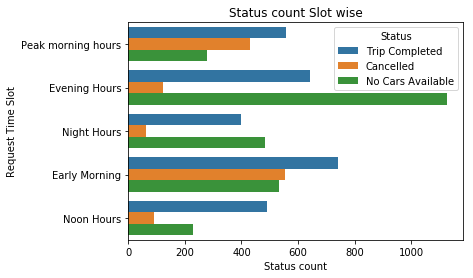

In [50]:
#Dtermine time slots when maximum trips were completed/canelled/no cars available
sns.countplot(y="Request Time Slot",hue="Status",data = uberdata)
plt.title('Status count Slot wise')
plt.xlabel('Status count')
#During evening hours (5pm -8pm) maximum no of requests ended with no cars available (approx 1000-1200 )
#During early morning hours (1am-7am) maximum no of trips were canceled. (approx 500-600)
#During early morning hours (1am-7am) maximum no of trips were completed.(approx 700)

In [51]:
#Creating individual data frames for each trip status no cars available/trip completed/cancelled
df_nocars = uberdata[(uberdata['Status'] == 'No Cars Available')]
df_tripcompl = uberdata[(uberdata['Status'] == 'Trip Completed')]
df_canceled = uberdata[(uberdata['Status'] == 'Cancelled')]

Text(0.5,0,'Airport/City count')

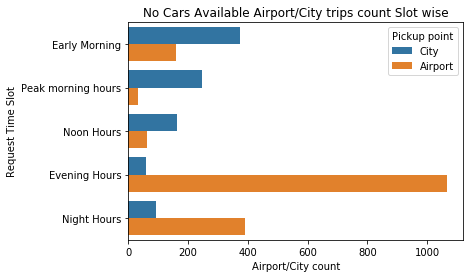

In [52]:
#Determine the time slot for each type of request when cars were not available
sns.countplot(y="Request Time Slot",hue="Pickup point",data = df_nocars)
plt.title('No Cars Available Airport/City trips count Slot wise')
plt.xlabel('Airport/City count')
# For airport pickups during evening hours of 5pm - 8pm maximum request ended up with no cars available (approx 1100 - 1200)
# For city pickups during early morning hours of 1am - 7am maximum request ended up with no cars available (approx 350-400)

Text(0.5,0,'Airport/City count')

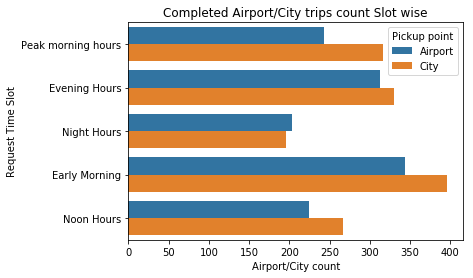

In [53]:
#Determine the time slot for each type of request when trip was completed
sns.countplot(y="Request Time Slot",hue="Pickup point",data = df_tripcompl)
plt.title('Completed Airport/City trips count Slot wise')
plt.xlabel('Airport/City count')
#For city pickups maximum trips were completed during early morning hours 1am- 7am (approx 400)
#For airport picksups maximum trips were completed during early morning hours only 1am-7am (approx 340)

Text(0.5,0,'Airport/City count')

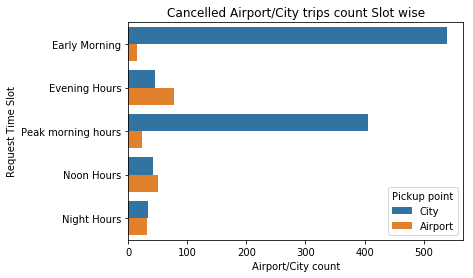

In [54]:
#Determine the time slot for each type of request when trip was cancelled
sns.countplot(y="Request Time Slot",hue="Pickup point",data = df_canceled)
plt.title('Cancelled Airport/City trips count Slot wise')
plt.xlabel('Airport/City count')
#For city pickups maximum trips were canceled during early morning hours of 1am - 7am (approx 500-600)
#For airport pickups maximum trips were canceled during evening hours of 5pm-8pm (approx 50-90)

Text(0.5,0,'Airport/City Count')

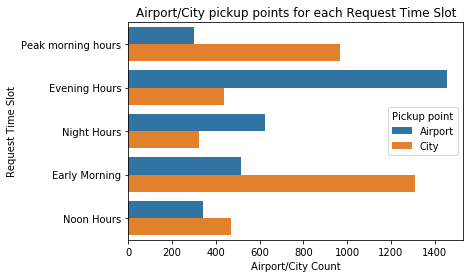

In [55]:
#Dtermine the time slot when maximum number airport/city pickup request came
sns.countplot(y="Request Time Slot",hue="Pickup point",data = uberdata)
plt.title('Airport/City pickup points for each Request Time Slot')
plt.xlabel('Airport/City Count')
#Maximum city pickup  request came during early morning hours of 1AM-7AM
#Maximum airport pickup requests came during evening hours of 5pm-8pm

In [56]:
#Total requests where cars were not available
print("Total requests where cars were not available :"+str(len(df_nocars.index)))
#Total requests which were cancelled
print("Total requests which were cancelled :"+str(len(df_canceled.index)))
#Total requests which were Completed
print("Total requests which were Completed :"+str(len(df_tripcompl.index)))

Total requests where cars were not available :2650
Total requests which were cancelled :1264
Total requests which were Completed :2831


In [57]:
#Calculating total demand i.e sum of trips with all three status
demand = len(df_nocars.index) + len(df_canceled.index) + len(df_tripcompl.index)
print("Total Demand :"+str(demand))
#Calculating total supply i.e total no if trips completed = 2831
supply = len(df_tripcompl.index)
print("Total Supply :"+str(supply))
#Now calculate gap between demand and supply i.e gap = demand - supply
gap = demand - supply
print("Total Gap :"+str(gap))

Total Demand :6745
Total Supply :2831
Total Gap :3914


Text(0.5,0,'Demand Count')

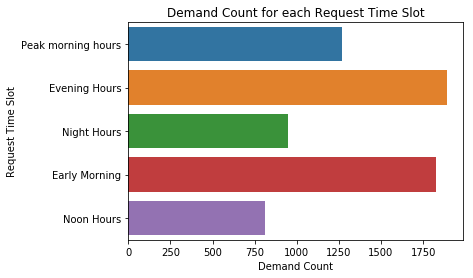

In [58]:
#Plotting no of request for each time slot
sns.countplot(y="Request Time Slot",data = uberdata)
plt.title('Demand Count for each Request Time Slot')
plt.xlabel('Demand Count')
#Calculate total demand for each time slot
# 0 - 8 - Early Morning hours - approx 1800-1900
# 8 - 12 - Peak morning hours - approx 1250-1300
# 12 - 17 - Noon hours - approx 750-850
# 17 - 21 - Evening hours - approx 1800-2000
# 21 - 23 - Night Hours - approx 700-750

#We can infer that maximum demand is during evening hours between 5PM-8PM.

Text(0.5,0,'Supply Count')

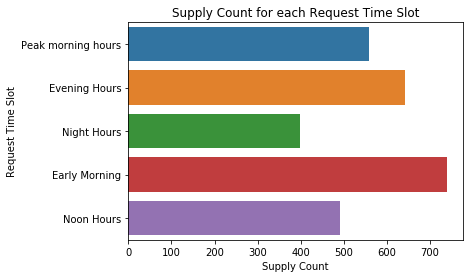

In [59]:
#Plotting no of request for each time slot only where request was completed.

sns.countplot(y="Request Time Slot",data = df_tripcompl)
plt.title('Supply Count for each Request Time Slot')
plt.xlabel('Supply Count')

#Calculate total supply for each time slot where trip is completed
# 0 - 8 - Early Morning hours - approx 700-750
# 8 - 12 - Peak morning hours - approx 500-550
# 12 - 17 - Noon hours - approx 450-500
# 17 - 21 - Evening hours - approx 600-650
# 21 - 23 - Night Hours - approx 250-300

#We can infer that maximum supply is in early morning hours between 1am - 7am.

In [60]:
#Calculating exact demand/supply count for each time slot and then calculate gap = demand-supply using pandas functions

#Early Morning Hours demand
demand_earlymorning = uberdata[(uberdata['Request Time Slot'] == 'Early Morning')]['Request id'].count()
print("Early Morning Hours Demand: "+str(demand_earlymorning))
#Early Morning Hours supply
supply_earlymorning = uberdata[(uberdata['Request Time Slot'] == 'Early Morning') & (uberdata['Status'] == 'Trip Completed')]['Request id'].count()
print("Early Morning Hours Supply: "+str(supply_earlymorning))

gap_earlymorning = demand_earlymorning - supply_earlymorning
print("Early Morning Hours Gap: "+str(gap_earlymorning))

Early Morning Hours Demand: 1827
Early Morning Hours Supply: 740
Early Morning Hours Gap: 1087


In [61]:
#Peak Morning hours demand
demand_peakmorning = uberdata[(uberdata['Request Time Slot'] == 'Peak morning hours')]['Request id'].count()
print("Peak Morning Hours Demand: "+str(demand_peakmorning))
#Peak Morning hours supply
supply_peakmorning = uberdata[(uberdata['Request Time Slot'] == 'Peak morning hours') & (uberdata['Status'] == 'Trip Completed')]['Request id'].count()
print("Peak Morning Hours Supply: "+str(supply_peakmorning))

gap_peakmorning = demand_peakmorning - supply_peakmorning
print("Peak Morning Hours Gap: "+str(gap_peakmorning))

Peak Morning Hours Demand: 1268
Peak Morning Hours Supply: 559
Peak Morning Hours Gap: 709


In [62]:
#Noon hours demand
demand_noon = uberdata[(uberdata['Request Time Slot'] == 'Noon Hours')]['Request id'].count()
print("Noon Hours Demand: "+str(demand_noon))
#Noon hours supply
supply_noon = uberdata[(uberdata['Request Time Slot'] == 'Noon Hours') & (uberdata['Status'] == 'Trip Completed')]['Request id'].count()
print("Noon Hours Supply: "+str(supply_noon))

gap_noon = demand_noon - supply_noon
print("Noon Hours Gap: "+str(gap_noon))

Noon Hours Demand: 810
Noon Hours Supply: 491
Noon Hours Gap: 319


In [63]:
#Evening Hours demand
demand_evening = uberdata[(uberdata['Request Time Slot'] == 'Evening Hours')]['Request id'].count()
print("Evening Hours Demand: "+str(demand_evening))
#Evening Hours supply
supply_evening = uberdata[(uberdata['Request Time Slot'] == 'Evening Hours') & (uberdata['Status'] == 'Trip Completed')]['Request id'].count()
print("Evening Hours Supply: "+str(supply_evening))

gap_evening = demand_evening - supply_evening
print("Evening Hours Gap: "+str(gap_evening))

Evening Hours Demand: 1893
Evening Hours Supply: 642
Evening Hours Gap: 1251


In [64]:
#Night hours demand
demand_night = uberdata[(uberdata['Request Time Slot'] == 'Night Hours')]['Request id'].count()
print("Night Hours Demand: "+str(demand_night))
#Night hours supply
supply_night = uberdata[(uberdata['Request Time Slot'] == 'Night Hours') & (uberdata['Status'] == 'Trip Completed')]['Request id'].count()
print("Night Hours Supply: "+str(supply_night))

gap_night = demand_night - supply_night
print("Night Hours Gap: "+str(gap_night))

Night Hours Demand: 947
Night Hours Supply: 399
Night Hours Gap: 548


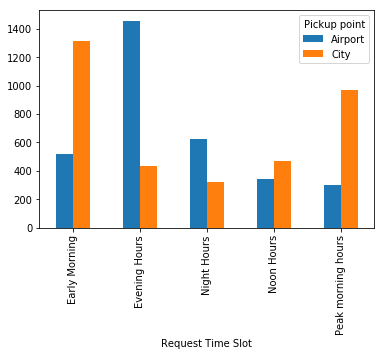

In [65]:
uberdata.groupby(['Request Time Slot','Pickup point']).size().unstack().plot(kind='bar',stacked=False)

In [66]:
#Dtermine count for Airport To City request for each time slot.
airport_earlymorning_cnt = uberdata[(uberdata['Pickup point'] == 'Airport') & (uberdata['Request Time Slot'] == 'Early Morning') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
airport_peakmorning_cnt = uberdata[(uberdata['Pickup point'] == 'Airport') & (uberdata['Request Time Slot'] == 'Peak morning hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
airport_noon_cnt = uberdata[(uberdata['Pickup point'] == 'Airport') & (uberdata['Request Time Slot'] == 'Noon Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
airport_evening_cnt = uberdata[(uberdata['Pickup point'] == 'Airport') & (uberdata['Request Time Slot'] == 'Evening Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
airport_night_cnt = uberdata[(uberdata['Pickup point'] == 'Airport') & (uberdata['Request Time Slot'] == 'Night Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()

In [67]:
#Dtermine count for City To Airport request for each time slot.
city_earlymorning_cnt = uberdata[(uberdata['Pickup point'] == 'City') & (uberdata['Request Time Slot'] == 'Early Morning') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
city_peakmorning_cnt = uberdata[(uberdata['Pickup point'] == 'City') & (uberdata['Request Time Slot'] == 'Peak morning hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
city_noon_cnt = uberdata[(uberdata['Pickup point'] == 'City') & (uberdata['Request Time Slot'] == 'Noon Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
city_evening_cnt = uberdata[(uberdata['Pickup point'] == 'City') & (uberdata['Request Time Slot'] == 'Evening Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()
city_night_cnt = uberdata[(uberdata['Pickup point'] == 'City') & (uberdata['Request Time Slot'] == 'Night Hours') & (uberdata['Status'] != 'Trip Completed')]['Request id'].count()

In [69]:
#Creating a new gap data frame which contains details of all time slots.

gap_data = { 'Time Slot': ['Early morning','Peak morning','Noon','Evening','Night'] , 
            'Demand/Supply Gap': [gap_earlymorning,gap_peakmorning,gap_noon,gap_evening,gap_night],
            'Airport To City Count' : [airport_earlymorning_cnt,airport_peakmorning_cnt,airport_noon_cnt,airport_evening_cnt,airport_night_cnt],
            'City To Airport Count' : [city_earlymorning_cnt,city_peakmorning_cnt,city_noon_cnt,city_evening_cnt,city_night_cnt]}

gap_df = pd.DataFrame(data=gap_data)

In [70]:
#Inspecting gap_df
gap_df

,Time Slot,Demand/Supply Gap,Airport To City Count,City To Airport Count
0,Early morning,1087,173,914
1,Peak morning,709,58,651
2,Noon,319,114,205
3,Evening,1251,1145,106
4,Night,548,421,127


Text(0.5,6.8,'Total Gap')

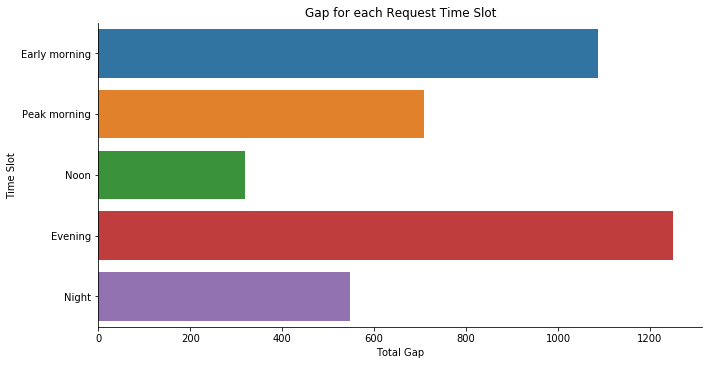

In [71]:
#Plotting demand/supply gap according to time slots.
sns.catplot(x="Demand/Supply Gap",y="Time Slot",kind="bar",data = gap_df,height = 5,aspect=2)
plt.title('Gap for each Request Time Slot')
plt.xlabel('Total Gap')
#From below figure we can easily figure out that gap between demand and supply is maximum 
#for evening hours timme slot i.e 5pm-8pm.

C:\Users\Shivali_Dalmia\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Shivali_Dalmia\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


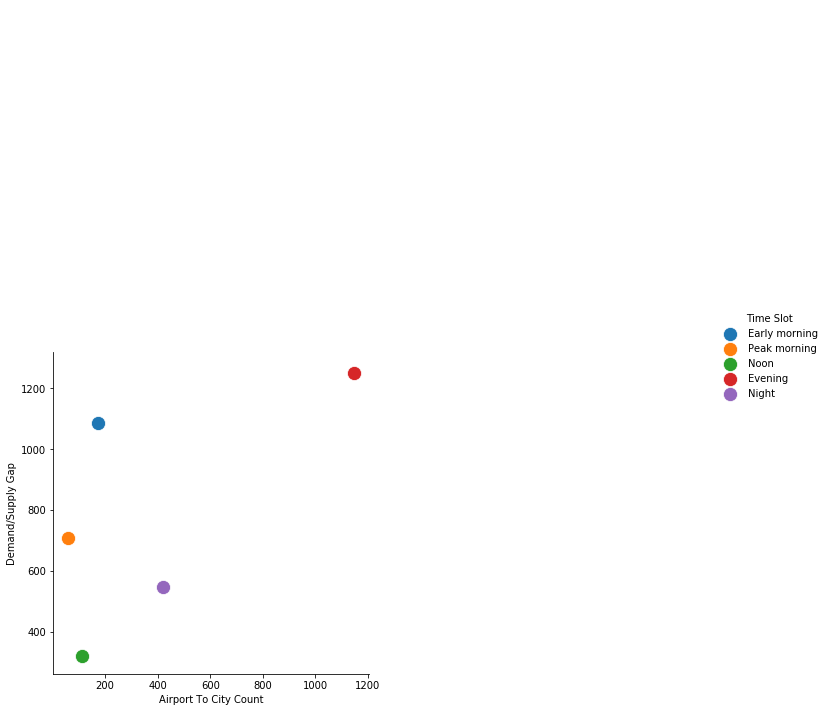

In [72]:
#Plotting demand/supply Gap for Airport to City rides.
airportVsGap = sns.pairplot(gap_df,vars = ['Airport To City Count', 'Demand/Supply Gap'],hue='Time Slot',plot_kws = {'alpha': 1, 's': 200},
             height = 5)
for i, j in zip(*np.triu_indices_from(airportVsGap.axes, 0)):
    airportVsGap.axes[i, j].set_visible(False)
    

#We can infer clearly that gap for evening slot is maximum for airport to city rides.

C:\Users\Shivali_Dalmia\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Shivali_Dalmia\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


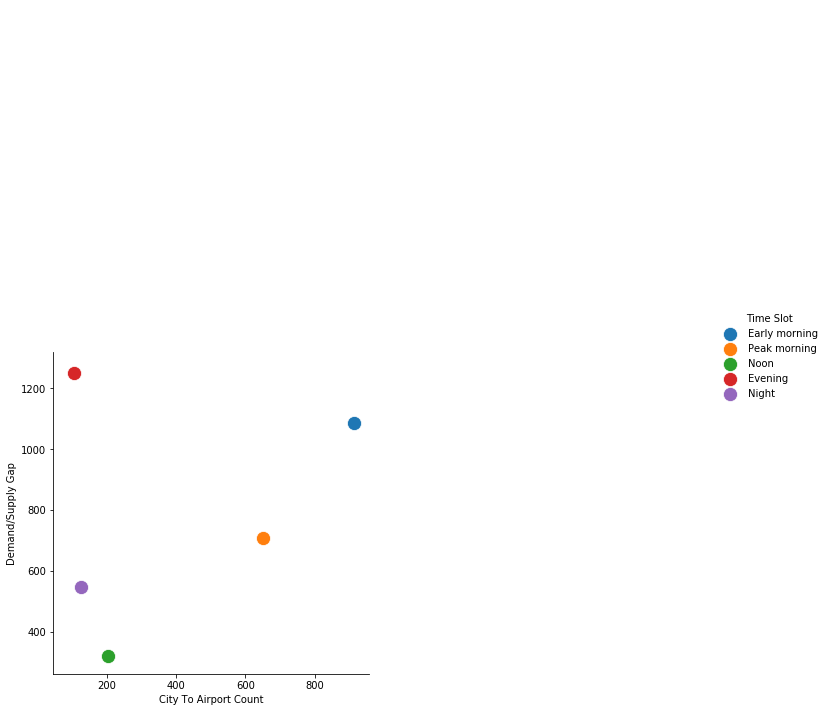

In [73]:
#Plotting demand/supply Gap for City to Airport rides.
airportVsGap = sns.pairplot(gap_df,vars = ['City To Airport Count', 'Demand/Supply Gap'],hue='Time Slot',plot_kws = {'alpha': 1, 's': 200},
             height = 5)
for i, j in zip(*np.triu_indices_from(airportVsGap.axes, 0)):
    airportVsGap.axes[i, j].set_visible(False)
    

#We can infer clearly that gap for evening slot is maximum but for city to airport rides its less than airport to city rides.

In [74]:
#Exporting final uber data set to CSV for tableau plotting
uberdata.to_csv("Uber Data.csv")

In [75]:
#Exporting final gap data set to CSV for tableau plotting
gap_df.to_csv("Gap Data.csv")